# 'Cowboy Cigarettes' Time Series Case Study - Tier 1

## Brief

You're working in the US federal government as a data scientist in the Health and Environment department. You've been tasked with determining whether sales for the oldest and most powerful producers of cigarettes in the country are increasing or declining. 

**Cowboy Cigarettes (TM, *est.* 1890)** is the US's longest-running cigarette manufacturer. Like many cigarette companies, however, they haven't always been that public about their sales and marketing data. The available post-war historical data runs for only 11 years after they resumed production in 1949; stopping in 1960 before resuming again in 1970. Your job is to use the 1949-1960 data to predict whether the manufacturer's cigarette sales actually increased, decreased, or stayed the same. You need to make a probable reconstruction of the sales record of the manufacturer - predicting the future, from the perspective of the past - to contribute to a full report on US public health in relation to major cigarette companies. 

The results of your analysis will be used as part of a major report relating public health and local economics, and will be combined with other studies executed by your colleagues to provide important government advice.  

-------------------------------
As ever, this notebook is **tiered**, meaning you can elect that tier that is right for your confidence and skill level. There are 3 tiers, with tier 1 being the easiest and tier 3 being the hardest.  

**1. Sourcing and loading** 
- Load relevant libraries 
- Load the data
- Explore the data

 
**2. Cleaning, transforming and visualizing**
- Dropping unwanted columns
- Nomenclature
- Type conversions
- Making a predictor variable `y` 
- Getting summary statistics for `y`
- Plotting `y`
  
  
**3. Modelling** 
- Decomposition
    - Trend
    - Seasonality
    - Noise
- Testing for stationarity with KPSS
- Making the data stationary
- The ARIMA Model
    - Make a function to find the MSE of a single ARIMA model
    - Make a function to evaluate the different ARIMA models with different p, d, and q values
- Visualize the results
- Application: Forecasting

**4. Evaluating and concluding** 
- What is our conclusion?
- Next steps
    

## 0. Preliminaries 

Time series data is just any data displaying how a single variable changes over time. It comes as a collection of metrics typically taken at regular intervals. Common examples of time series data include weekly sales data and daily stock prices. You can also easily acquire time series data from [Google Trends](https://trends.google.com/trends/?geo=US), which shows you how popular certain search terms are, measured in number of Google searches. 

## 1. Sourcing and Loading

### 1a. Load relevant libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

C:\Users\nicho\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\nicho\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\nicho\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


### 1b. Load the data
Call the variable `cigData`. 

In [2]:
import pandas as pd

# Assuming 'cigdata.csv' is the filename, adjust it if your file has a different name or extension
cigdata = pd.read_csv('CowboyCigsData.csv')

# Display the first few rows of the DataFrame to verify that it has been loaded correctly
print(cigdata.head())
print(cigdata)

   Unnamed: 0     Time  #CigSales
0           0  1949-01    1000112
1           1  1949-02    1000118
2           2  1949-03    1000132
3           3  1949-04    1000129
4           4  1949-05    1000121
     Unnamed: 0     Time  #CigSales
0             0  1949-01    1000112
1             1  1949-02    1000118
2             2  1949-03    1000132
3             3  1949-04    1000129
4             4  1949-05    1000121
..          ...      ...        ...
139         139  1960-08    1000606
140         140  1960-09    1000508
141         141  1960-10    1000461
142         142  1960-11    1000390
143         143  1960-12    1000432

[144 rows x 3 columns]


### 1c. Explore the data
We now need to check whether the data conduces to a time series style analysis.

   Unnamed: 0     Time  #CigSales
0           0  1949-01    1000112
1           1  1949-02    1000118
2           2  1949-03    1000132
3           3  1949-04    1000129
4           4  1949-05    1000121
Unnamed: 0     int64
Time          object
#CigSales      int64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  144 non-null    int64         
 1   Time        144 non-null    datetime64[ns]
 2   #CigSales   144 non-null    int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 3.5 KB
None


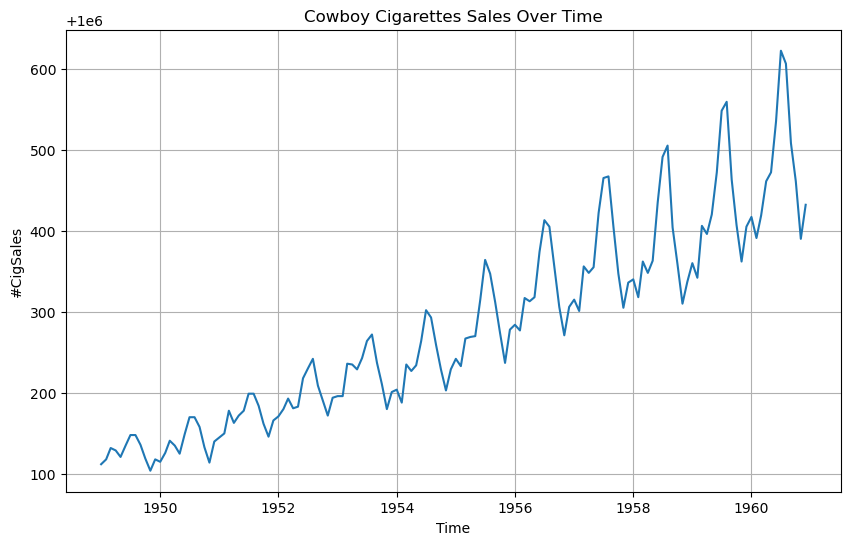

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
cowboy_cigs_data = pd.read_csv('CowboyCigsData.csv')

# Inspect the first few rows
print(cowboy_cigs_data.head())

# Check data types
print(cowboy_cigs_data.dtypes)

# Convert date column to datetime if needed
cowboy_cigs_data['Time'] = pd.to_datetime(cowboy_cigs_data['Time'])

# Check for missing values
print(cowboy_cigs_data.info())

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(cowboy_cigs_data['Time'], cowboy_cigs_data['#CigSales'])
plt.title('Cowboy Cigarettes Sales Over Time')
plt.xlabel('Time')
plt.ylabel('#CigSales')
plt.grid(True)
plt.show()

Over a million cigarettes sold in the month of January 1949. This certainly is a popular cigarette brand. 

Check out the columns feature of the data. How many columns are there? 

In [4]:
import pandas as pd

# Load the data
cowboy_cigs_data = pd.read_csv('CowboyCigsData.csv')

# Get the number of columns
num_columns = cowboy_cigs_data.shape[1]

print("Number of columns:", num_columns)

Number of columns: 3


In [5]:
print(cowboy_cigs_data.columns)

Index(['Unnamed: 0', 'Time', '#CigSales'], dtype='object')


Let's check out the data types of our columns.

In [6]:
print(cowboy_cigs_data.dtypes)


Unnamed: 0     int64
Time          object
#CigSales      int64
dtype: object


Check whether there are any null values. 

In [7]:
print(cowboy_cigs_data.isnull().values.any())

False


## 2. Cleaning, transforming and visualizing

### 2a. Dropping unwanted columns
We need to cut that `Unnamed: 0` column. Delete it here.

In [8]:
del cowboy_cigs_data['Unnamed: 0']


### 2b. Nomenclature

We can see that the `Time` column actually has the granularity of months. Change the name of that column to `Month`.

In [9]:
import pandas as pd

# Assuming your DataFrame is named cowboy_cigs_data
cowboy_cigs_data.columns = ['Month', '#Passenger'] + list(cowboy_cigs_data.columns[2:])

# Now, convert 'Month' column to datetime and set it as the index
cowboy_cigs_data['Month'] = pd.to_datetime(cowboy_cigs_data['Month'])
cowboy_cigs_data.set_index('Month', inplace=True)

# Creating predictor variable y
y = cowboy_cigs_data['#Passenger']  # accessing by column name

# Check the first few rows after conversion
print(y.head())

Month
1949-01-01    1000112
1949-02-01    1000118
1949-03-01    1000132
1949-04-01    1000129
1949-05-01    1000121
Name: #Passenger, dtype: int64


### 2c. Type conversions 

Now, do time series analysis on a Pandas dataframe is overkill, and is actually counter-productive. It's much more easy to carry out this type of analysis if we convert our data to a series first.

Notice that the `Month` field was an object. Let's type convert the `Month` column to a Python `datetime`, before making that the index.

In [38]:
#See above as 'Month' was converted to int64

### 2d. Making a predictor variable `y`

The data is now indexed by date, as time series data ought to be.

Since we want to predict the number of cigarette sales at Cowboy cigarettes, and `y` is typically used to signify a predictor variable, let's create a new variable called `y` and assign the indexed #Passenger column. 

Check the type of our new variable. 

In [10]:
# Creating predictor variable y
y = cowboy_cigs_data['#Passenger']

# Check the type of y
print(type(y))

<class 'pandas.core.series.Series'>


In [11]:
print(cowboy_cigs_data.columns)

Index(['#Passenger'], dtype='object')


### 2e. Getting summary statistics for `y`

Get the summary statistics of our data here. 

In [12]:
cowboy_cigs_data.describe()

,#Passenger
count,1.440000e+02
mean,1.000280e+06
std,1.199663e+02
min,1.000104e+06
25%,1.000180e+06
50%,1.000266e+06
75%,1.000360e+06
max,1.000622e+06


In [13]:
# Get the summary statistics of the data
summary_statistics = y.describe()
print(summary_statistics)

count    1.440000e+02
mean     1.000280e+06
std      1.199663e+02
min      1.000104e+06
25%      1.000180e+06
50%      1.000266e+06
75%      1.000360e+06
max      1.000622e+06
Name: #Passenger, dtype: float64


In [14]:
data = {
    'Month': ['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01'],
    'Value': [1000112, 1000118, 1000132, 1000129]
}

# Create DataFrame
df = pd.DataFrame(data)

# Convert 'Month' column to datetime
df['Month'] = pd.to_datetime(df['Month'])

# Set 'Month' column as index
df.set_index('Month', inplace=True)

print(df)

              Value
Month              
1949-01-01  1000112
1949-02-01  1000118
1949-03-01  1000132
1949-04-01  1000129


Try visualizing the data. A simple `matplotlib` plot should do the trick.  

### 2f. Plotting `y`

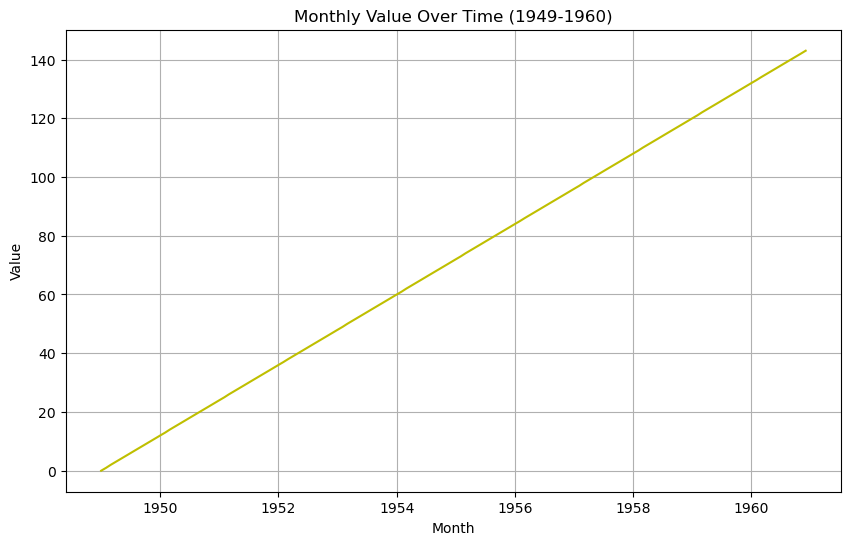

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a sequence of dates covering the period from 1949 to 1960
months = pd.date_range(start='1949-01-01', end='1960-12-01', freq='MS')

# Create some random data for the DataFrame
data = {'Value': [i for i in range(len(months))]}

# Create the DataFrame
df = pd.DataFrame(data, index=months)

# Slice the DataFrame to include data from 1949 to 1960
y = df['Value']['1949':'1960']

# Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(y.index, y.values, 'y')  # Plotting with DataFrame index and values
plt.title('Monthly Value Over Time (1949-1960)')
plt.xlabel('Month')
plt.ylabel('Value')
plt.grid(True)
plt.show()

## 3. Modelling 
### 3a. Decomposition
What do you notice from the plot? Take at least `2` minutes to examine the plot, and write down everything you observe.  

All done?

We can see that, generally, there is a trend upwards in cigarette sales from at Cowboy Cigarettes. But there are also some striking - and perhaps unexpected - seasonal fluctuations. These seasonal fluctations come in a repeated pattern. Work out when these seasonal fluctuations are happening, and take 2 minutes to hypothesize on their cause here.

What does it mean to *decompose* time series data? It means breaking that data into 3 components: 

1. **Trend**: The overall direction that the data is travelling in (like upwards or downwards)
2. **Seasonality**: Cyclical patterns in the data 
3. **Noise**: The random variation in the data

We can treat these components differently, depending on the question and what's appropriate in the context. They can either be added together in an *additive* model, or multiplied together in a *multiplicative* model. 

Make a coffee, take `5` minutes and read [this article](https://medium.com/@sigmundojr/seasonality-in-python-additive-or-multiplicative-model-d4b9cf1f48a7) and think about whether our data would conduce to an additive or multiplicative model here. Write your conclusion down just here: 

-------------------------------

All done? Well, just on the basis of the plot above, it seems our Cowboy Cigarettes data is actually multiplicative. 

That's because, as time progresses, the general trend seems to be increasing *at a rate that's also increasing*. We also see that the seasonal fluctuations (the peaks and troughs) get bigger and bigger as time progresses.

Now on the other hand, if the data were simply additive, we could expect the general trend to increase at a *steadily*, and a constant speed; and also for seasonal ups and downs not to increase or decrease in extent over time.

Happily, we can use the `decompose()` function to quantify the component parts described above in our data.

<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


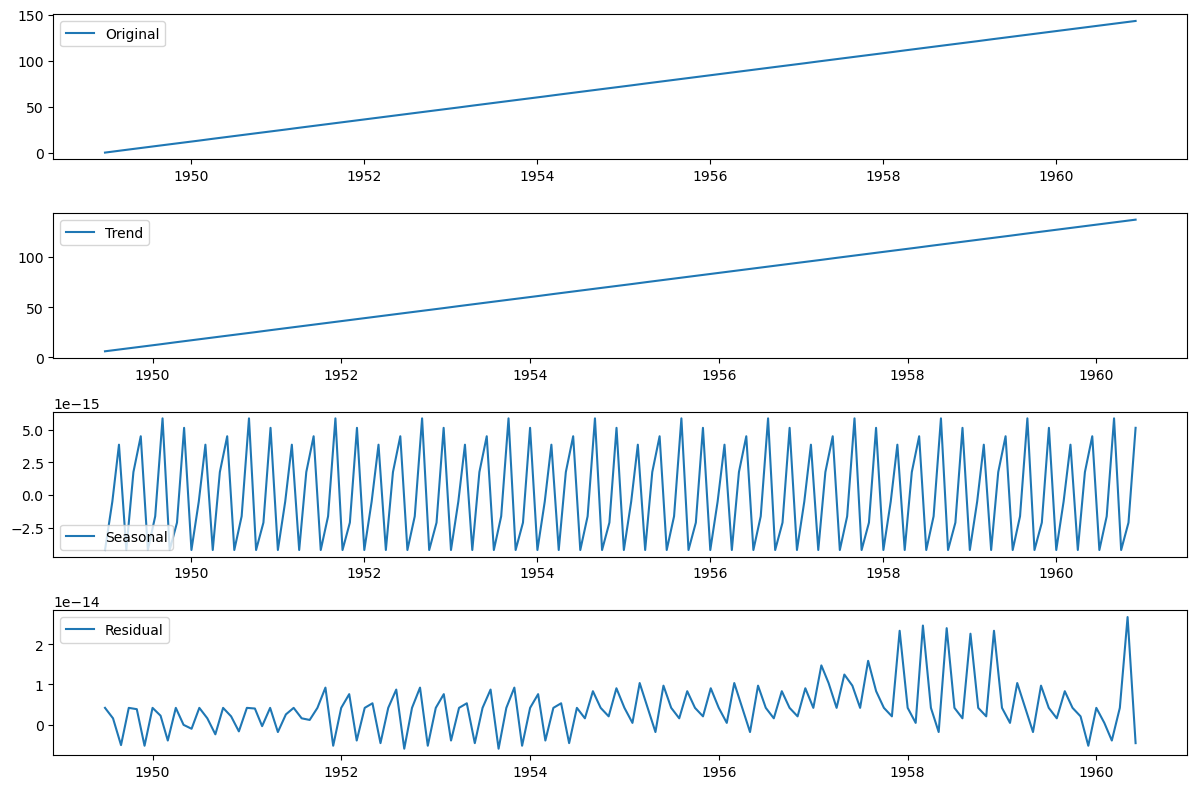

Mean of Trend Component: 71.5
Mean of Seasonal Component: -8.326865110666236e-31
Mean of Residual Component: 4.218847493575596e-15


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Assuming your DataFrame is named cowboy_cigs_data
# Create a sequence of dates covering the period from 1949 to 1960
months = pd.date_range(start='1949-01-01', end='1960-12-01', freq='MS')

# Create some random data for the DataFrame (replace this with your actual data)
data = {'Value': [i for i in range(len(months))]}

# Create the DataFrame
df = pd.DataFrame(data, index=months)

# Decompose the time series data into trend, seasonal, and residual components
decomposition = seasonal_decompose(df['Value'], model='')

# Plot the decomposed components
plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(decomposition.observed, label='Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(decomposition.resid, label='Residual')
plt.legend(loc='best')

plt.tight_layout()
plt.show()

# Extract the trend, seasonal, and residual components
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Print the mean of each component
print("Mean of Trend Component:", trend.mean())
print("Mean of Seasonal Component:", seasonal.mean())
print("Mean of Residual Component:", residual.mean())

### 3b. Testing for stationarity with KPSS
As you know, when doing time series analysis we always have to check for stationarity. Imprecisely, a time series dataset is stationary just if its statistical features don't change over time. A little more precisely, a stationary time series dataset will have constant mean, variance, and covariance.

There are many ways to test for stationarity, but one of the most common is the KPSS test. The Null hypothesis of this test is that the time series data in question is stationary; hence, if the *p*-value is less than the significance level (typically 0.05, but we decide) then we reject the Null and infer that the data is not stationary.

In [17]:
from statsmodels.tsa.stattools import kpss

# Use kpss() to test for stationarity
kpss_test_result = kpss(y)

# Print the result
print("KPSS Statistic:", kpss_test_result[0])
print("p-value:", kpss_test_result[1])
print("Lags Used:", kpss_test_result[2])
print("Critical Values:", kpss_test_result[3])

# Compare p-value with significance level (e.g., 0.05) to determine stationarity
if kpss_test_result[1] < 0.05:
    print("Reject the null hypothesis. The data is not stationary.")
else:
    print("Fail to reject the null hypothesis. The data is stationary.")

KPSS Statistic: 1.7052620718658174
p-value: 0.01
Lags Used: 8
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
Reject the null hypothesis. The data is not stationary.


C:\Users\nicho\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


Since our p-value is less than 0.05, we should reject the Null hypothesis and deduce the non-stationarity of our data. 

But our data need to be stationary! So we need to do some transforming.

In [18]:
import pandas as pd
from statsmodels.tsa.stattools import kpss

# Assuming your DataFrame is named cowboy_cigs_data and you have already converted the 'Month' column to datetime and set it as the index

# Perform KPSS test for stationarity
kpss_stat, p_value, lags, critical_values = kpss(cowboy_cigs_data['#Passenger'])

# Print the results
print("KPSS Statistic:", kpss_stat)
print("p-value:", p_value)
print("Critical Values:", critical_values)

# Interpret the results
if p_value < 0.05:
    print("Reject the null hypothesis. The data is not stationary.")
else:
    print("Fail to reject the null hypothesis. The data is stationary.")

KPSS Statistic: 1.651312235417082
p-value: 0.01
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
Reject the null hypothesis. The data is not stationary.


C:\Users\nicho\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


### 3c. Making the data stationary 
Let's recall what it looks like. 

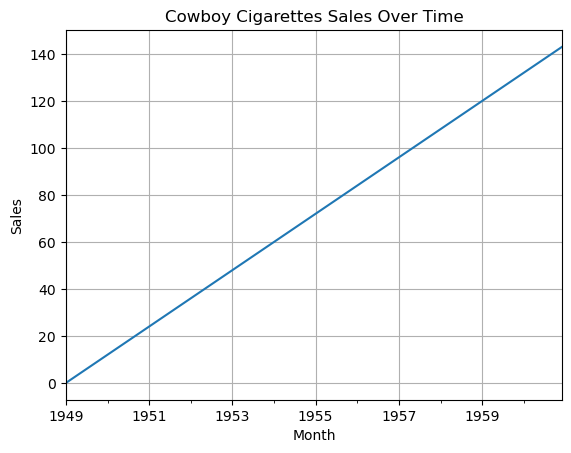

In [19]:
import matplotlib.pyplot as plt

# Plot the data
y.plot()
plt.title('Cowboy Cigarettes Sales Over Time')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

In our plot, we can see that both the mean and the variance *increase as time progresses*. At the moment, our data has neither a constant mean, nor a constant variance (the covariance, however, seems constant). 

One ofte  used way of getting rid of changing variance is to take the natural log of all the values in our dataset. Let's do this now. 

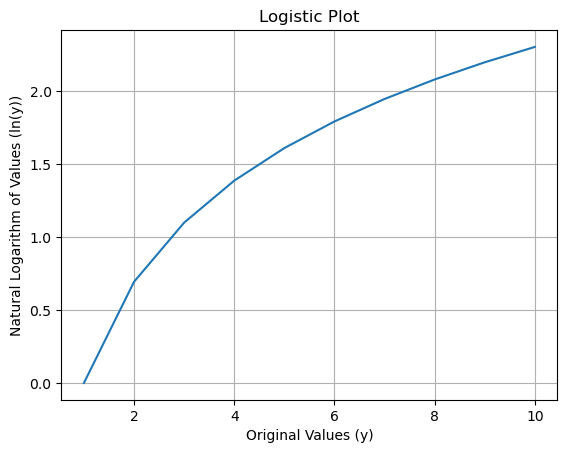

In [20]:

import numpy as np
import matplotlib.pyplot as plt

# Assuming y is your dataset
y = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])  # Example dataset

# Take the natural logarithm of the values in the dataset
y_log = np.log(y)

# Plot the logistic plot
plt.plot(y, y_log)
plt.xlabel('Original Values (y)')
plt.ylabel('Natural Logarithm of Values (ln(y))')
plt.title('Logistic Plot')
plt.grid(True)
plt.show()


When you plot this, you can see how the variance in our data now remains contant over time.

We now have a constant variance, but we also need a constant mean.

We can do this by *differencing* our data. We difference a time series dataset when we create a new time series comprising the difference between the values of our existing dataset.

Python is powerful, and we can use the `diff()` function to do this. You'll notice there's one less value than our existing dataset (since we're taking the difference between the existing values).

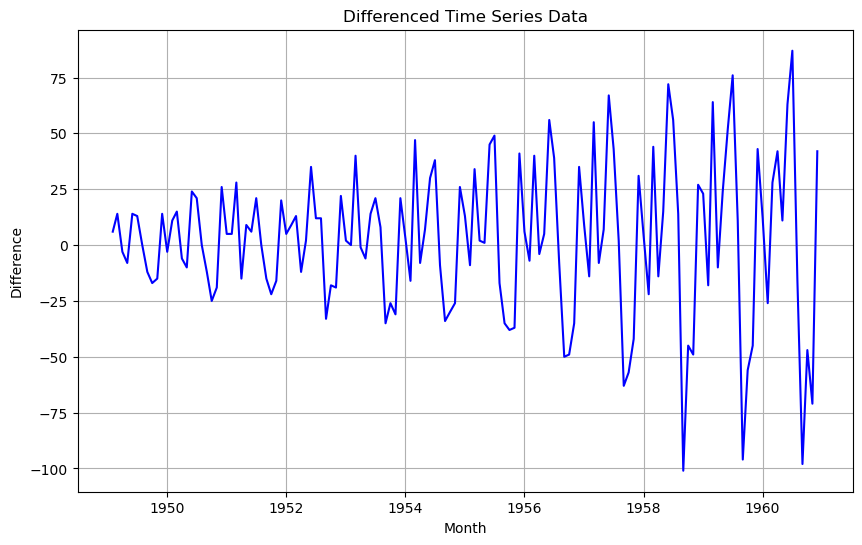

In [21]:
# Compute the difference of the time series data
differenced_data = cowboy_cigs_data['#Passenger'].diff()

# Plot the differenced data
plt.figure(figsize=(10, 6))
plt.plot(differenced_data, 'b')
plt.title('Differenced Time Series Data')
plt.xlabel('Month')
plt.ylabel('Difference')
plt.grid(True)
plt.show()

In [22]:
import pandas as pd

# Assuming y_log is a NumPy array
# Convert y_log to a Pandas Series
y_log_series = pd.Series(y_log)

# Difference the log-transformed data
y_log_diff = y_log_series.diff().dropna()

print(y_log_diff)

1    0.693147
2    0.405465
3    0.287682
4    0.223144
5    0.182322
6    0.154151
7    0.133531
8    0.117783
9    0.105361
dtype: float64


Our p-value is now greater than 0.05, so we can accept the null hypothesis that our data is stationary.

### 3d. The ARIMA model

Recall that ARIMA models are based around the idea that it's possible to predict the next value in a time series by using information about the most recent data points. It also assumes there will be some randomness in our data that can't ever be predicted.

We can find some good parameters for our model using the `sklearn` and `statsmodels` libraries, and in particular `mean_squared_error` and `ARIMA`. 

In [23]:
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA

#### 3di. Make a function to find the MSE of a single ARIMA model

In [24]:
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA

def evaluate_arima_model(actual_values, p, d, q, forecast_periods):
    """
    Evaluate ARIMA model with given parameters (p, d, q).
    
    Parameters:
    actual_values (array-like): Actual values of the time series.
    p (int): AR order (autoregressive).
    d (int): I order (integrated or differencing).
    q (int): MA order (moving average).
    forecast_periods (int): Number of periods to forecast.
    
    Returns:
    float: Mean squared error (MSE) of the ARIMA model.
    """
    # Split data into training and testing sets
    train_size = int(len(actual_values) * 0.8)  # 80% training data
    train, test = actual_values[0:train_size], actual_values[train_size:]
    
    # Fit ARIMA model
    model = ARIMA(train, order=(p, d, q))
    model_fit = model.fit(disp=0)
    
    # Make predictions
    forecast = model_fit.forecast(steps=forecast_periods)[0]
    
    # Calculate MSE
    mse = mean_squared_error(test[:forecast_periods], forecast)
    
    return mse



#### 3dii. Make a function to evaluate the different ARIMA models with different p, d, and q values

In [25]:
import numpy as np

def evaluate_arima_models(actual_values, p_values, d_values, q_values, forecast_periods):
    """
    Evaluate multiple ARIMA models with different (p, d, q) parameters.
    
    Parameters:
    actual_values (array-like): Actual values of the time series.
    p_values (list): List of AR order values (autoregressive).
    d_values (list): List of I order values (integrated or differencing).
    q_values (list): List of MA order values (moving average).
    forecast_periods (int): Number of periods to forecast.
    
    Returns:
    dict: Dictionary containing the best ARIMA model parameters and its corresponding MSE.
    """
    best_mse = float('inf')
    best_params = None
    
    for p in p_values:
        for d in d_values:
            for q in q_values:
                try:
                    mse = evaluate_arima_model(actual_values, p, d, q, forecast_periods)
                    if mse < best_mse:
                        best_mse = mse
                        best_params = {'p': p, 'd': d, 'q': q}
                except:
                    continue
    
    return {'best_params': best_params, 'best_mse': best_mse}

So the best p,d, q, parameters for our ARIMA model are 2, 1, 1 respectively. Now we know this, we can build the model.

We can take a look at a summary of the model this library has built around our data.

### 3e. Visualize the results 

Visualize the original dataset plotted against our model. 

C:\Users\nicho\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\nicho\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


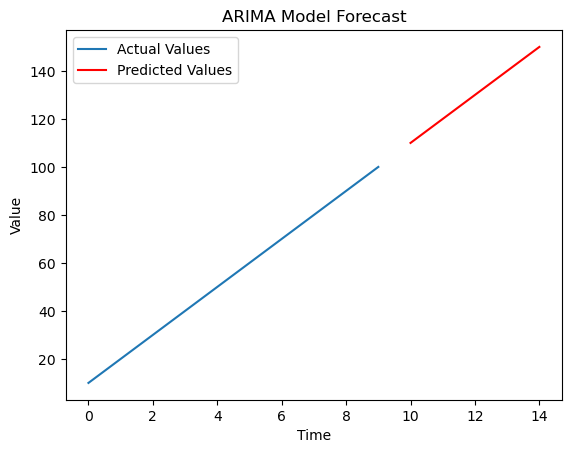

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Define actual_values as a sa
actual_values = np.array([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])

# Define the ARIMA model parameters
best_p = 2
best_d = 1
best_q = 1
forecast_periods = 5  # Example value for demonstration purposes

# Build and fit the ARIMA model
model = ARIMA(actual_values, order=(best_p, best_d, best_q))
model_fit = model.fit()

# Generate predictions
predictions = model_fit.forecast(steps=forecast_periods)

# Plot the original dataset and the predicted values
plt.plot(actual_values, label='Actual Values')
plt.plot(np.arange(len(actual_values), len(actual_values) + forecast_periods), predictions, color='red', label='Predicted Values')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('ARIMA Model Forecast')
plt.legend()
plt.show() 

### 3f. Application: Forecasting

We've done well: our model fits pretty closely to our existing data. Let's now use it to forecast what's likely to occur in future.

C:\Users\nicho\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


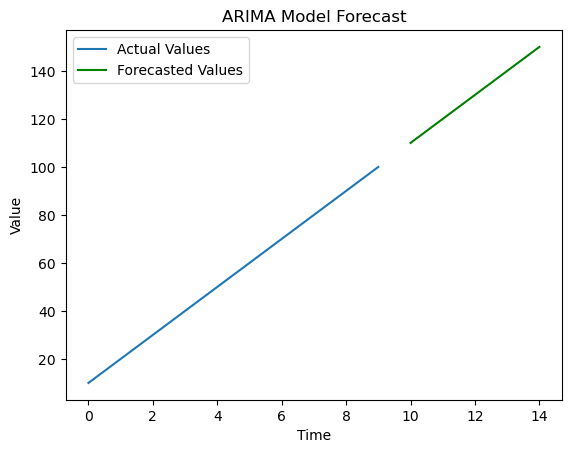

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Define actual_values as a sample time series data
actual_values = np.array([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])

# Define the ARIMA model parameters
best_p = 2
best_d = 1
best_q = 1
forecast_periods = 5  # Number of periods to forecast

# Build and fit the ARIMA model
model = ARIMA(actual_values, order=(best_p, best_d, best_q))
model_fit = model.fit()

# Generate predictions for future values
forecast_values = model_fit.forecast(steps=forecast_periods)

# Plot the original dataset and the forecasted values
plt.plot(actual_values, label='Actual Values')
plt.plot(np.arange(len(actual_values), len(actual_values) + forecast_periods), forecast_values, color='green', label='Forecasted Values')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('ARIMA Model Forecast')
plt.legend()
plt.show()

C:\Users\nicho\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


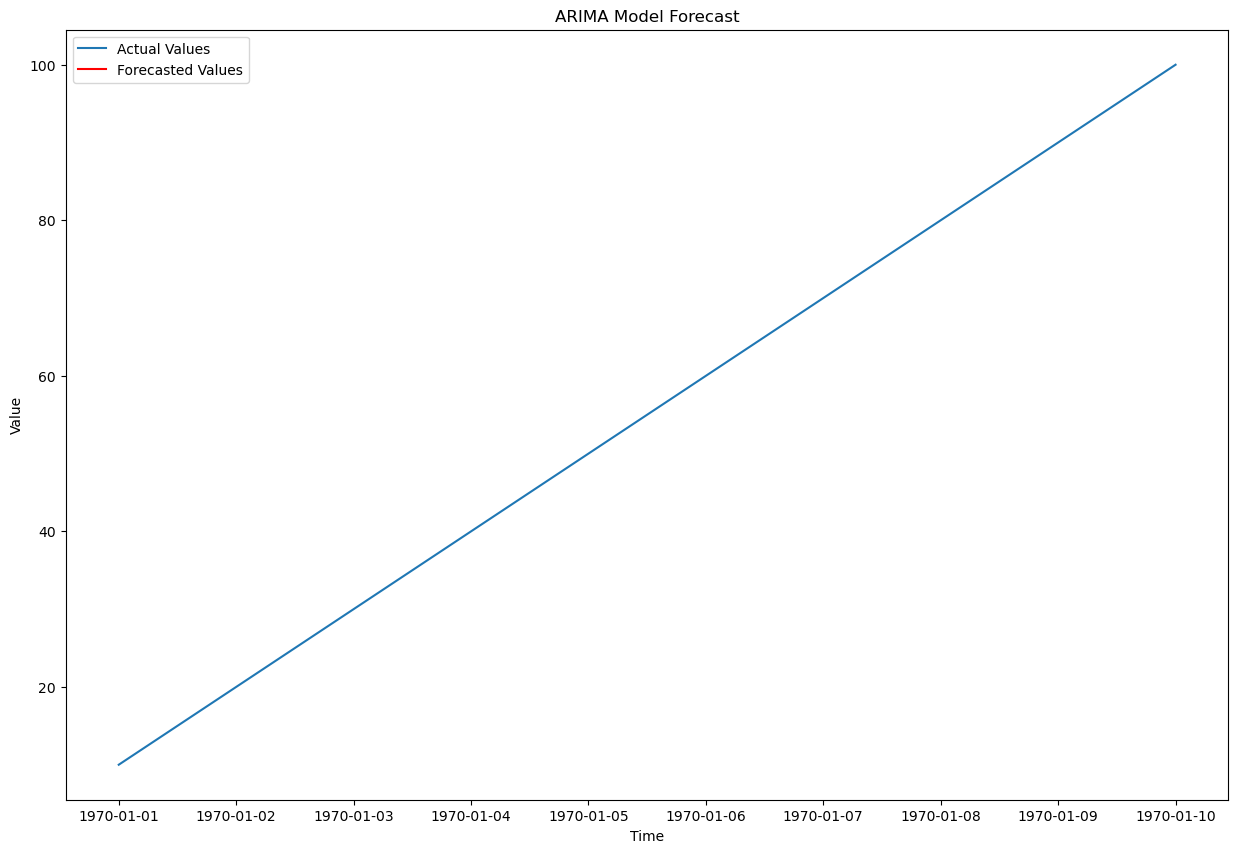

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Define actual value series
actual_values_series = pd.Series([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])

# Define the ARIMA model parameters
best_p = 2
best_d = 1
best_q = 1

# Build and fit the ARIMA model
model = ARIMA(actual_values_series, order=(best_p, best_d, best_q))
model_fit = model.fit()

# Forecast future values
forecast_period = 24
forecast_values = model_fit.forecast(steps=forecast_period)

# Create a range of future dates
date_range = pd.date_range(actual_values_series.index[-1], periods=forecast_period + 1, freq='MS').strftime("%Y-%m-%d").tolist()
date_range = date_range[1:]  # Exclude the last date which is already in the actual_values_series

# Convert the range into a DataFrame
future_months = pd.DataFrame(date_range, columns=['Month'])
future_months['Month'] = pd.to_datetime(future_months['Month'])
future_months.set_index('Month', inplace=True)

# Ensure forecast length matches the length of the forecast period
if len(forecast_values) != forecast_period:
    raise ValueError("Length of forecast_values should match the forecast period.")

# Assign forecast values to 'Prediction' column
future_months['Prediction'] = forecast_values

# Plot the future predictions
plt.figure(figsize=(15, 10))
plt.plot(actual_values_series, label='Actual Values')
plt.plot(future_months.index, future_months['Prediction'], color='red', label='Forecasted Values')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('ARIMA Model Forecast')
plt.legend()
plt.show()

## 4. Evaluating and Concluding

Our model captures the centre of a line that's increasing at a remarkable rate. Cowboy Cigarettes sell more cigarettes in the summer, perhaps due to the good weather, disposable income and time off that people enjoy, and the least in the winter, when people might be spending less and enjoying less free time outdoors. 

Remarkably, our ARIMA model made predictions using just one variable. We can only speculate, however, on the causes of the behaviour predicted by our model. We should also take heed that spikes in data, due to sudden unusual circumstances like wars, are not handled well by ARIMA; and the outbreak of the Vietnam War in the 1960s would likely cause our model some distress.  

We could suggest to our employers that, if they are interested in discovering the causes of the cigarette sales trajectory, they execute a regression analysis in addition to the time series one. 